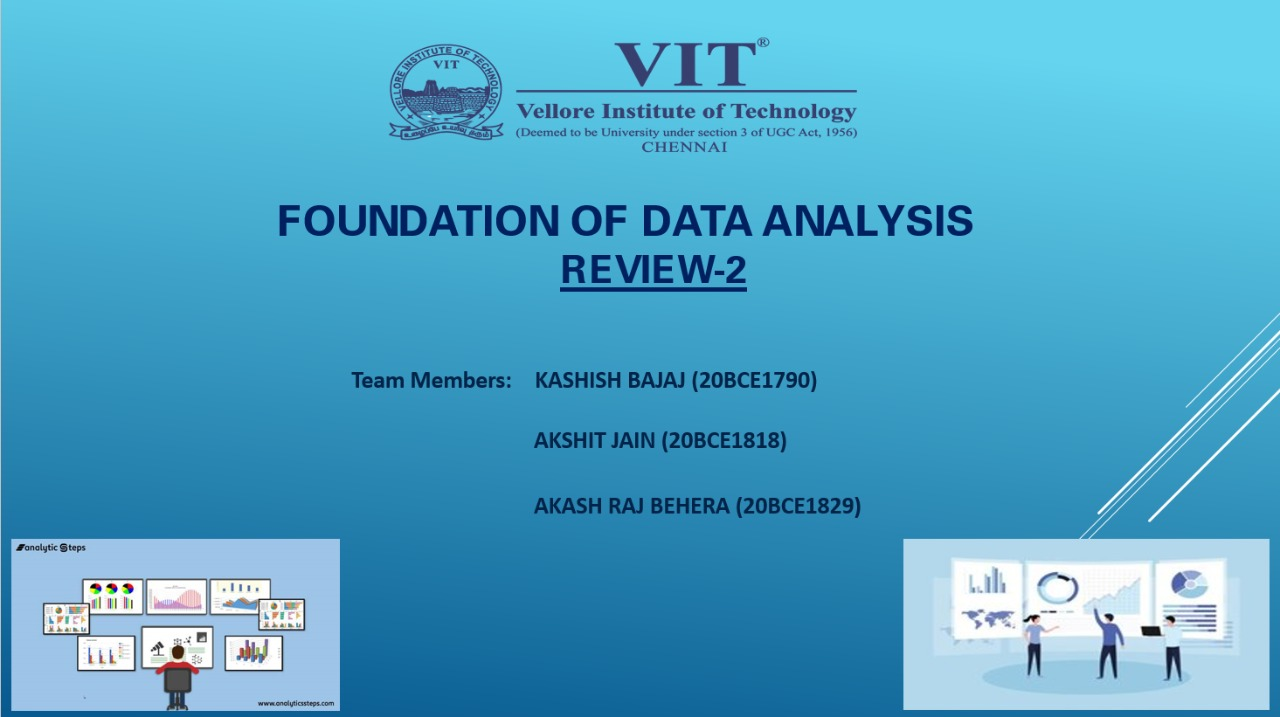

### **DATASET**
*For this project we will use 4 datasets containing of listings of all the movies and tv shows available
on Netflix, Hulu, Disney Plus and Amazon Prime, along with details such as - cast, directors, ratings,
release year, duration, etc.*

### **DATASET LINK :**https://www.kaggle.com/datasets/shivamb/netflix-shows

# **Dataset preprocessing and cleaning**

In [71]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
from plotly.offline import iplot
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS
import random
import re

##In the following codes 
**df1**-  *Amazon Prime Dataset*

**df2**- *Hulu Dataset*

**df3** - *Disney Plus Dataset*

**df4** - *Netflix Dataset*


In [5]:

df1 = pd.read_csv("amazon_prime_titles.csv", delimiter=",", encoding="latin-1", parse_dates=["date_added"], index_col=["show_id"])
df2 = pd.read_csv("hulu_titles.csv", delimiter=",", encoding="latin-1", parse_dates=["date_added"], index_col=["show_id"])
df3 = pd.read_csv("disney_plus_titles.csv", delimiter=",", encoding="latin-1", parse_dates=["date_added"], index_col=["show_id"])
df4 = pd.read_csv("netflix_titles.csv", delimiter=",", encoding="latin-1", parse_dates=["date_added"], index_col=["show_id"])

In [6]:
print("The size and shape of dataset 1")
print(df1.size)
print(df1.shape)

The size and shape of dataset 1
106348
(9668, 11)


In [7]:
print("The size and shape of dataset 2")
print(df2.size)
print(df2.shape)

The size and shape of dataset 2
33803
(3073, 11)


In [8]:
print("The size and shape of dataset 3")
print(df3.size)
print(df3.shape)

The size and shape of dataset 3
15950
(1450, 11)


In [9]:
print("The size and shape of dataset 4")
print(df4.size)
print(df4.shape)

The size and shape of dataset 4
96877
(8807, 11)


In [10]:
df1.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [11]:
df2.dtypes

type                    object
title                   object
director                object
cast                   float64
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [12]:
df3.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [13]:
df4.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

##**DATA CLEANING**
We will go through all 4 datasets to clean them.

In [14]:
df1["date_added"] = df1["date_added"].dt.year
df1["date_added"].unique()

array([2021.,   nan])

In [15]:
df1["date_added"].fillna(0, inplace=True)
df1["date_added"] = df1["date_added"].astype(int)
df1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, BeyoncÃ©, Britne...",United States,2021,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [16]:
df1.loc[df1["date_added"]==0, ]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s17,Movie,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",NaN,0,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...
s18,TV Show,Zoo Babies,NaN,Narrator - Gillian Barlett,NaN,0,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...
s19,TV Show,ZoÃ« Coombs Marr: Bossy Bottom,NaN,ZoÃ« Coombs Marr,NaN,0,2020,18+,1 Season,"Comedy, Talk Show and Variety",ZoÃ« Coombs Marr has been on hiatus. Sort of. ...
s20,Movie,Zoe,Drake Doremus,"Ewan McGregor, LÃ©a Seydoux, Theo James, Miran...",NaN,0,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...
s21,TV Show,Zoboomafoo,NaN,NaN,NaN,0,2001,TV-Y,1 Season,Kids,Chris and Martin Kratt bring their enthusiasm ...
...,...,...,...,...,...,...,...,...,...,...,...
s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,0,1940,7+,60 min,Comedy,New York City street principles get an East Si...
s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,0,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,0,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9668 entries, s1 to s9668
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7586 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    9668 non-null   int64 
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
 10  description   9668 non-null   object
dtypes: int64(2), object(9)
memory usage: 906.4+ KB


In [18]:
df1.duplicated().sum()

0

In [19]:
df1.fillna("No Data", inplace=True)
df1.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

FOR DATASET 2(HULU), we will also convert float64 to string


In [20]:
df2['cast'] = df2['cast'].astype(str)

In [21]:
df2["date_added"] = df2["date_added"].dt.year
df2["date_added"].unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2010., 2009., 2008., 2006.,   nan])

In [22]:
df2["date_added"].fillna(0, inplace=True)
df2["date_added"] = df2["date_added"].astype(int)
df2.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Ricky Velez: Here's Everything,NaN,nan,NaN,2021,2021,TV-MA,NaN,"Comedy, Stand Up",âComedian Ricky Velez bares it all with his ...
s2,Movie,Silent Night,NaN,nan,NaN,2021,2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
s3,Movie,The Marksman,NaN,nan,NaN,2021,2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
s4,Movie,Gaia,NaN,nan,NaN,2021,2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
s5,Movie,Settlers,NaN,nan,NaN,2021,2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [23]:
df2.loc[df2["date_added"]==0, ]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s3046,TV Show,Angel,NaN,nan,United States,0,1999,TV-14,5 Seasons,"Action, Adventure, Drama","Joss Whedon, the creator and executive produce..."
s3047,TV Show,Arrested Development,NaN,nan,United States,0,2003,TV-14,3 Seasons,"Comedy, Sitcom","In this critically acclaimed series, Michael B..."
s3048,TV Show,Black Butler: Book of Circus,NaN,nan,Japan,0,2014,TV-14,1 Season,"Action, Adventure, Anime",When children begin to vanish after the arriva...
s3049,TV Show,Blade Dance of the Elementalers,NaN,nan,Japan,0,2014,TV-14,1 Season,"Action, Adventure, Anime",The prestigious Areishia Spirit Academy has tr...
s3050,TV Show,Boys Before Flowers,NaN,nan,South Korea,0,2009,TV-14,1 Season,"Comedy, Drama, International",Boys Over Flowers is one of the biggest Korean...
s3051,TV Show,Buffy the Vampire Slayer,NaN,nan,United States,0,1997,TV-PG,7 Seasons,"Drama, Science Fiction, Teen",Buffy the Vampire Slayer is a comedy-action se...
s3052,TV Show,Doctora Juguetes,NaN,nan,NaN,0,2012,TV-Y,1 Season,"Kids, Latino",Una mÃ¡gica serie animada acerca de Doc McStuf...
s3053,TV Show,Firefly,NaN,nan,United States,0,2002,TV-PG,1 Season,"Action, Adventure, Science Fiction",The Crew of a starship travel through outer sp...
s3054,TV Show,Frasier,NaN,nan,United States,0,1993,TV-PG,11 Seasons,"Comedy, Sitcom","Comedy series set in Seattle, WA, which chroni..."


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3073 entries, s1 to s3073
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          3073 non-null   object
 1   title         3073 non-null   object
 2   director      3 non-null      object
 3   cast          3073 non-null   object
 4   country       1620 non-null   object
 5   date_added    3073 non-null   int64 
 6   release_year  3073 non-null   int64 
 7   rating        2553 non-null   object
 8   duration      2594 non-null   object
 9   listed_in     3073 non-null   object
 10  description   3069 non-null   object
dtypes: int64(2), object(9)
memory usage: 288.1+ KB


In [25]:
df2.duplicated().sum()

0

In [26]:
df2.fillna("No Data", inplace=True)
df2.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

For Dataset 3 (DISNEY)

In [27]:
df3["date_added"] = df3["date_added"].dt.year
df3["date_added"].unique()

array([2021., 2020., 2019.,   nan])

In [28]:
df3["date_added"].fillna(0, inplace=True)
df3["date_added"] = df3["date_added"].astype(int)
df3.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [29]:
df3.loc[df3["date_added"]==0, ]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1440,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,0,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
s1441,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
s1442,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,0,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450 entries, s1 to s1450
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1450 non-null   object
 1   title         1450 non-null   object
 2   director      977 non-null    object
 3   cast          1260 non-null   object
 4   country       1231 non-null   object
 5   date_added    1450 non-null   int64 
 6   release_year  1450 non-null   int64 
 7   rating        1447 non-null   object
 8   duration      1450 non-null   object
 9   listed_in     1450 non-null   object
 10  description   1450 non-null   object
dtypes: int64(2), object(9)
memory usage: 135.9+ KB


In [31]:
df3.duplicated().sum()

0

In [32]:
df3.fillna("No Data", inplace=True)
df3.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

FOR DATASET 4 (NETFLIX)

In [33]:
df4["date_added"] = df4["date_added"].dt.year
df4["date_added"].unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2009., 2008.,   nan, 2010.])

In [34]:
df4["date_added"].fillna(0, inplace=True)
df4["date_added"] = df4["date_added"].astype(int)
df4.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [35]:
df4.loc[df4["date_added"]==0, ]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,0,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,0,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,0,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,0,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,0,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,0,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Ã...",United States,0,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,0,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason SaldaÃ±a, Gustavo Sorola, ...",United States,0,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


In [36]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8807 non-null   int64 
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(2), object(9)
memory usage: 825.7+ KB


In [37]:
df4.duplicated().sum()

0

In [38]:
df4.fillna("No Data", inplace=True)
df4.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

##ALL THE DATASETS ARE CLEAN


In [39]:
df1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021,2014,No Data,113 min,"Comedy, Drama",A small fishing village must procure a local d...
s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021,2017,No Data,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, BeyoncÃ©, Britne...",United States,2021,2014,No Data,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021,1989,No Data,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [40]:
df2.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Ricky Velez: Here's Everything,No Data,nan,No Data,2021,2021,TV-MA,No Data,"Comedy, Stand Up",âComedian Ricky Velez bares it all with his ...
s2,Movie,Silent Night,No Data,nan,No Data,2021,2020,No Data,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
s3,Movie,The Marksman,No Data,nan,No Data,2021,2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
s4,Movie,Gaia,No Data,nan,No Data,2021,2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
s5,Movie,Settlers,No Data,nan,No Data,2021,2021,No Data,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [41]:
df3.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",No Data,2021,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",No Data,2021,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",No Data,2021,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
s5,TV Show,The Beatles: Get Back,No Data,"John Lennon, Paul McCartney, George Harrison, ...",No Data,2021,2021,No Data,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [42]:
df4.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **Visualization of DF1 (AMAZON Prime)**


Text(0.2, 1.03, 'Types of Amazon Prime Content')

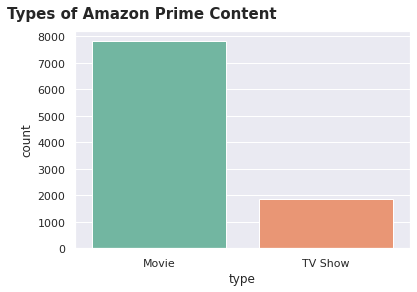

In [43]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df1, palette="Set2")
ax.set_title(f'Types of Amazon Prime Content', fontsize=15, fontweight='bold', position=(0.20, 1.03))

The graph shows the content available on Amazon

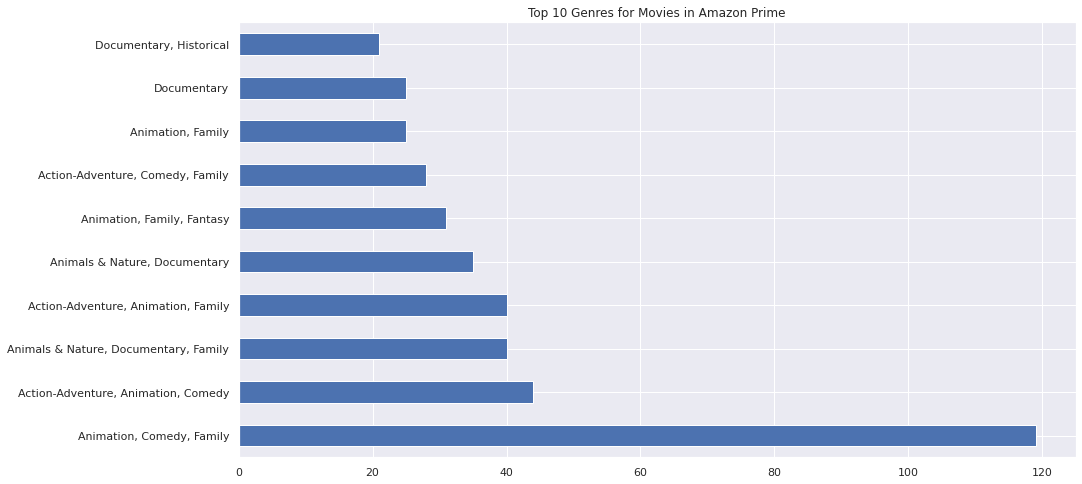

In [44]:
plt.figure(figsize = (15,8))
plt.title('Top 10 Genres for Movies in Amazon Prime')
df3[df3["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind='barh')
plt.show()

In [45]:
d1 = df1[df1["type"] == "TV Show"]
d2 = df1[df1["type"] == "Movie"]

col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [46]:
col = "rating"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


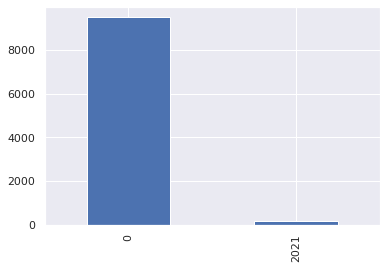

In [47]:
df1['date_added'].value_counts().plot(kind='bar')

## **Visualization of DF2 (Hulu)**

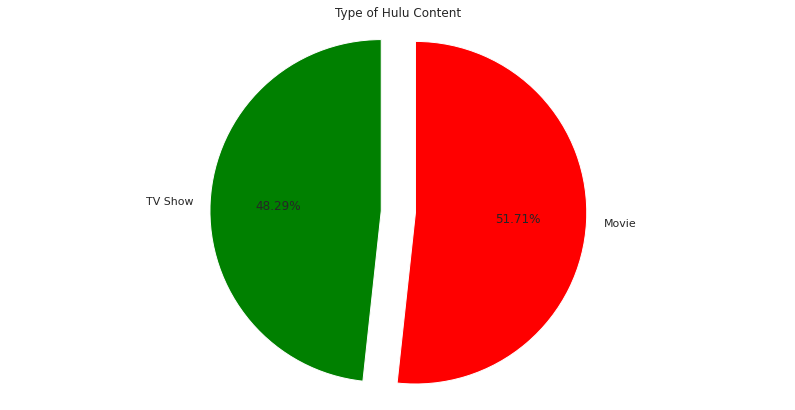

In [48]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df2['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],autopct='%1.2f%%',colors=['green','red'], startangle=90)
plt.title('Type of Hulu Content')
plt.axis('equal')
plt.show()

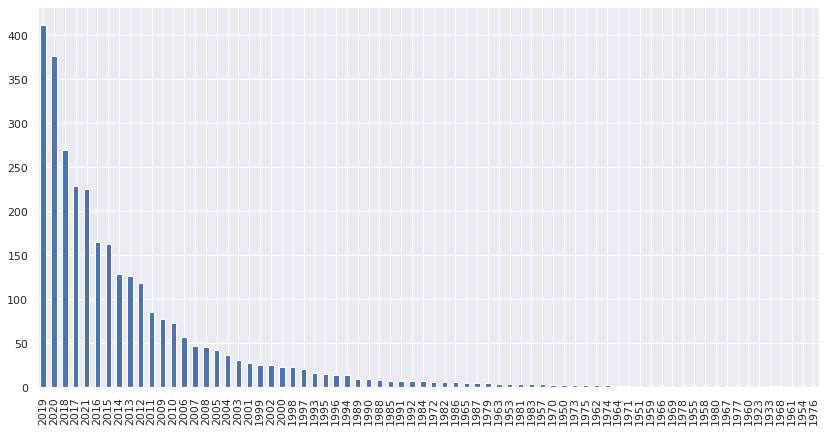

In [49]:
plt.figure(figsize=(14, 7))
df2['release_year'].value_counts().plot(kind='bar')

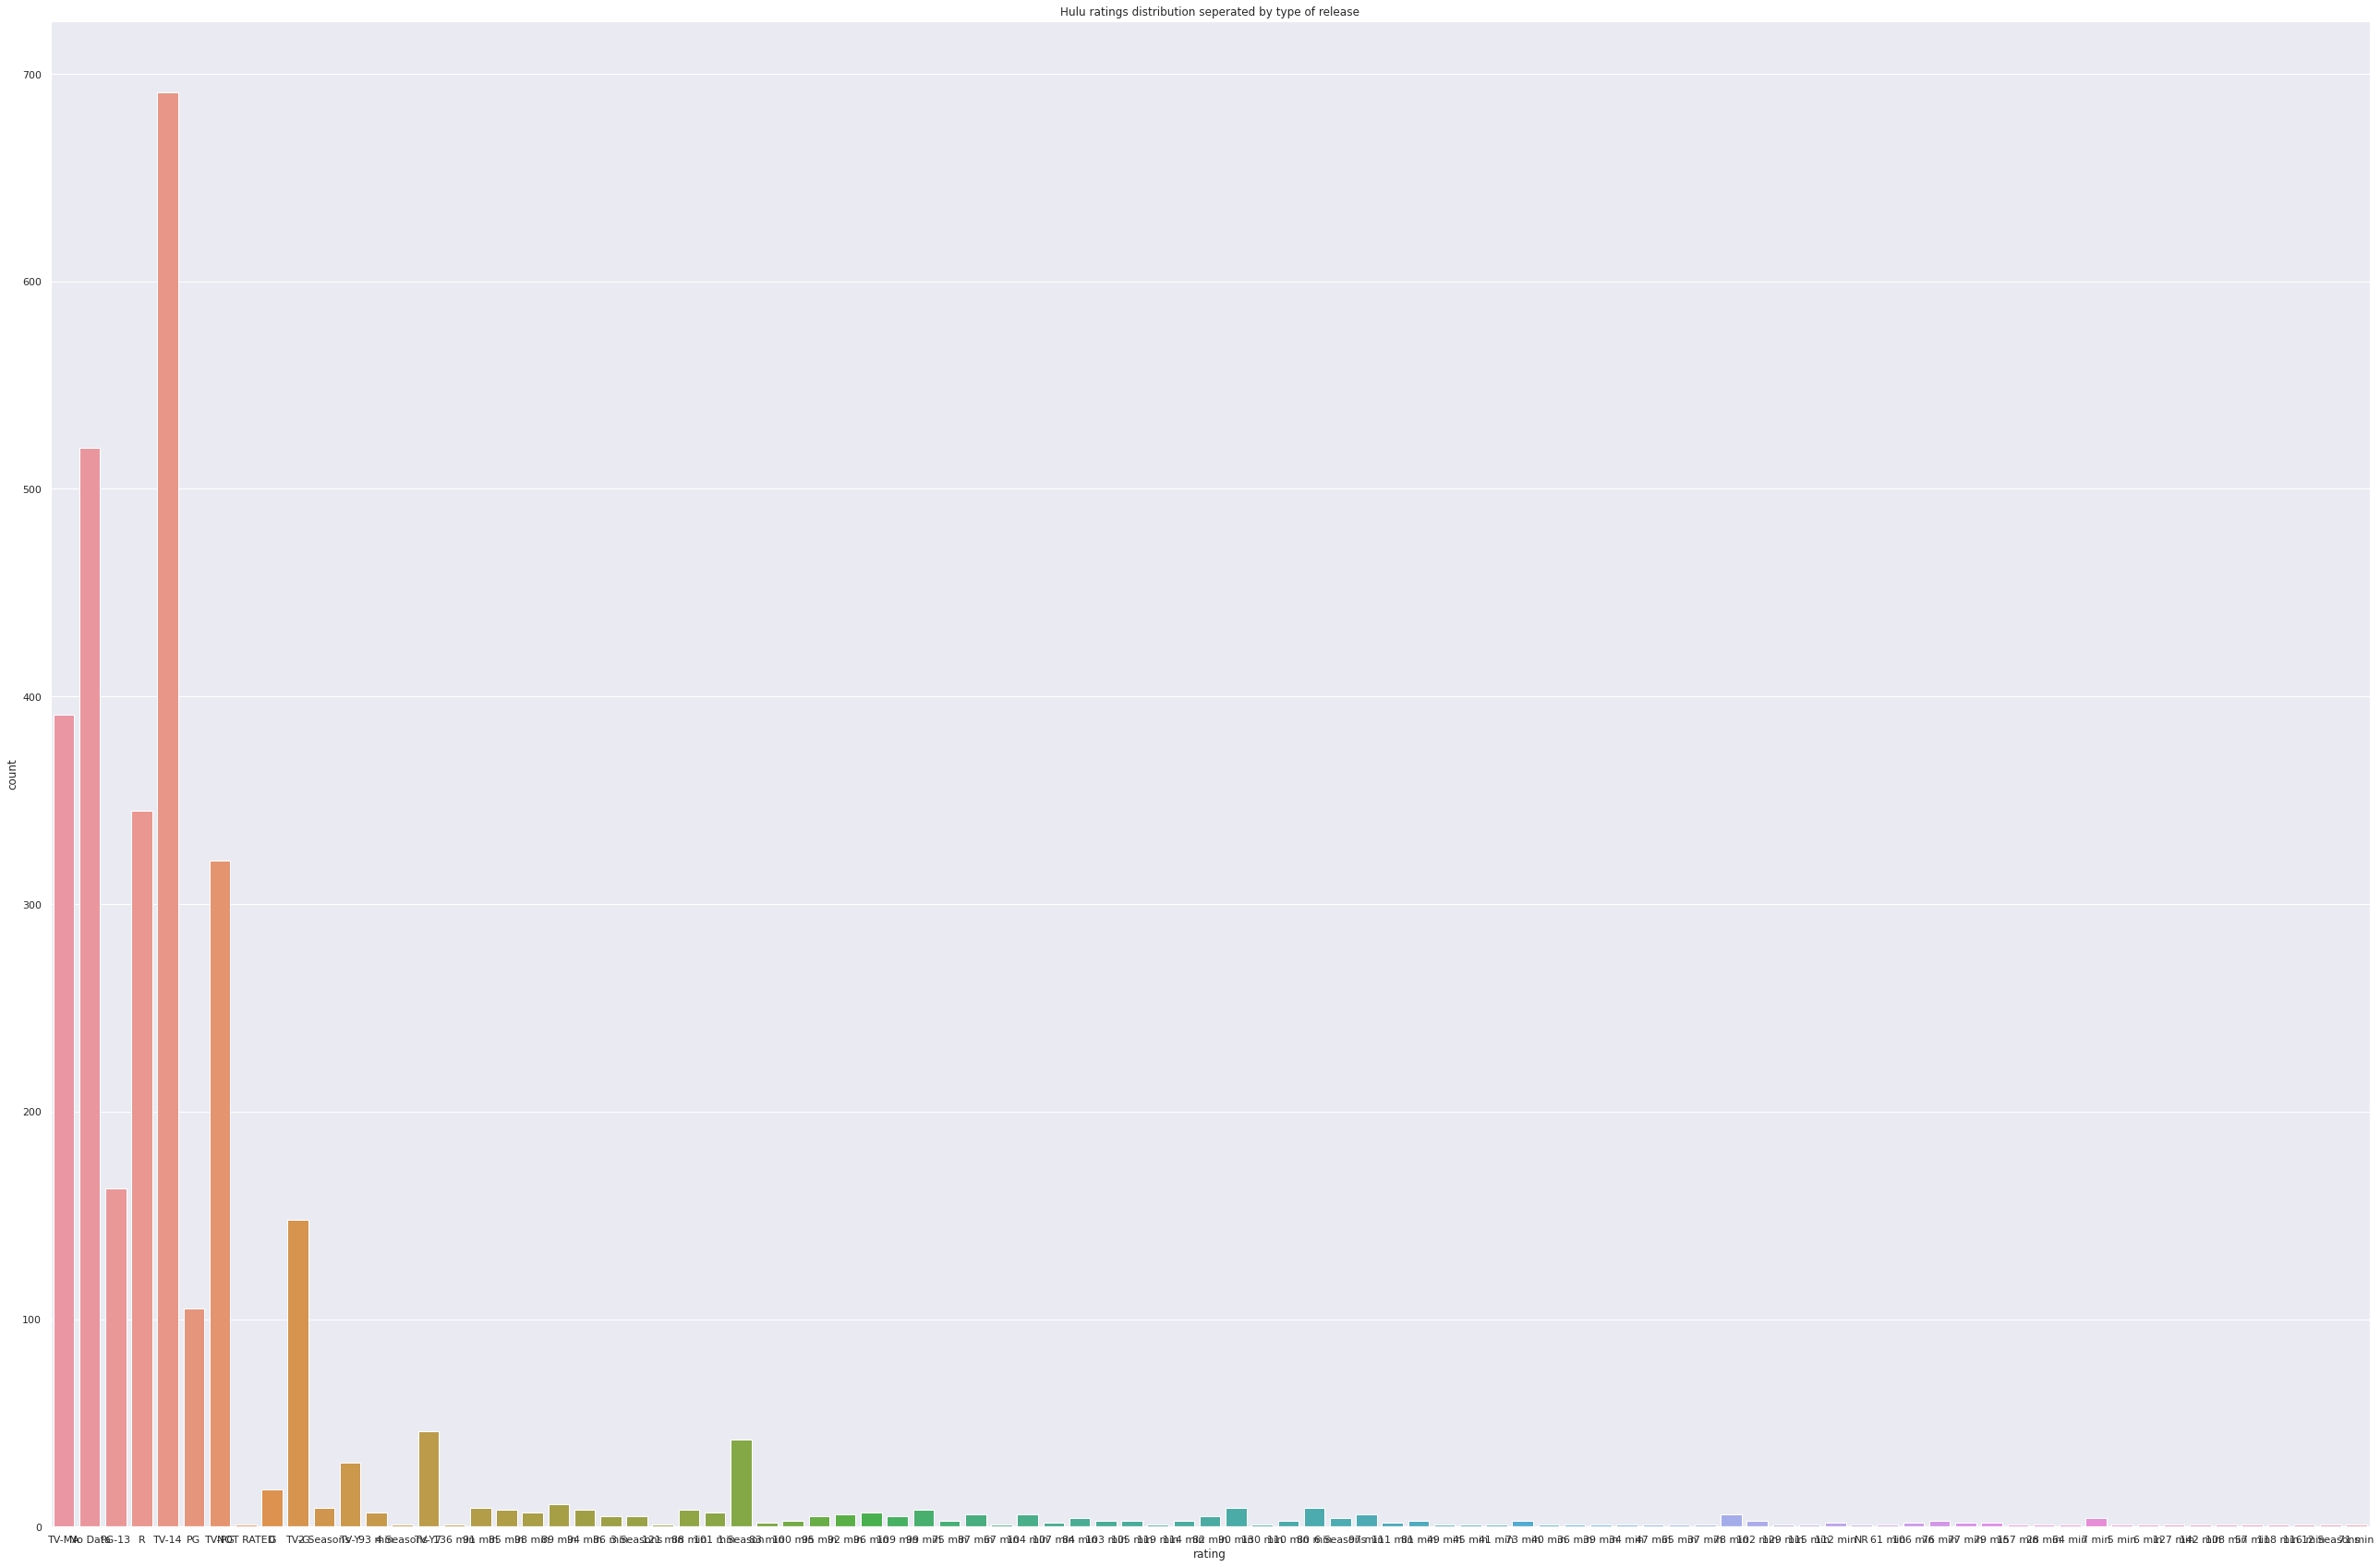

In [50]:
plt.figure(figsize = (45,30))
plt.title('Hulu ratings distribution seperated by type of release')
sns.countplot(x='rating', data=df2)
plt.show()

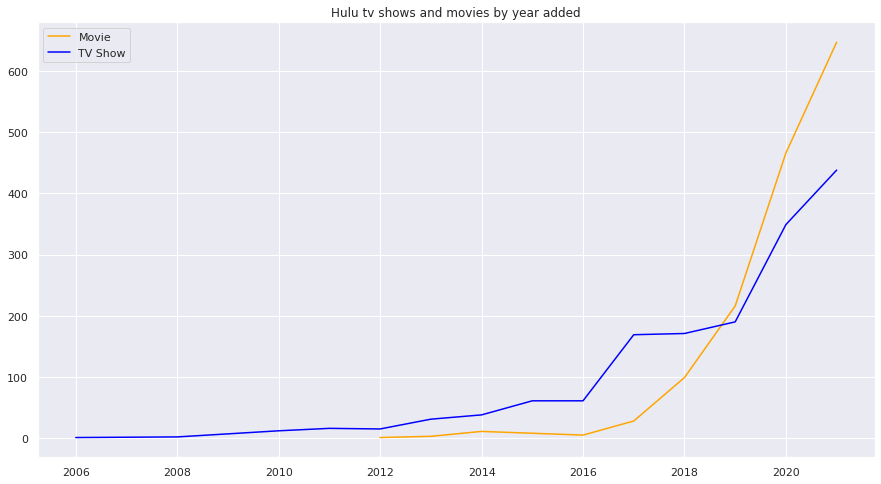

In [51]:
plt.figure(figsize=(15,8))
movie = df2[df2['type'] == 'Movie' ]
tv = df2[df2['type'] == 'TV Show']
movie = movie[movie['date_added']>2000]
tv = tv[tv['date_added']>2000]
added_counts= movie['date_added'].value_counts()
added_tv_counts= tv['date_added'].value_counts()
sns.lineplot(x=added_counts.index,y=added_counts.values, color="orange", label='Movie')
sns.lineplot(x=added_tv_counts.index,y=added_tv_counts.values, color="blue", label='TV Show')
plt.title('Hulu tv shows and movies by year added')
plt.legend()
plt.show()

## **Visualization of DF3 (Disney Plus)**

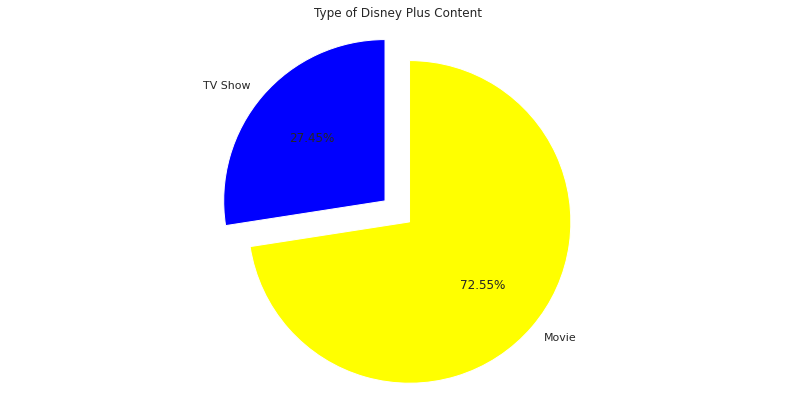

In [52]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df3['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],autopct='%1.2f%%',colors=['blue','yellow'], startangle=90)
plt.title('Type of Disney Plus Content')
plt.axis('equal')
plt.show()

From the above chart it is clearly observed that the on Disney plus platform 72.68% of the content is movies and 27.45% is TV shows.


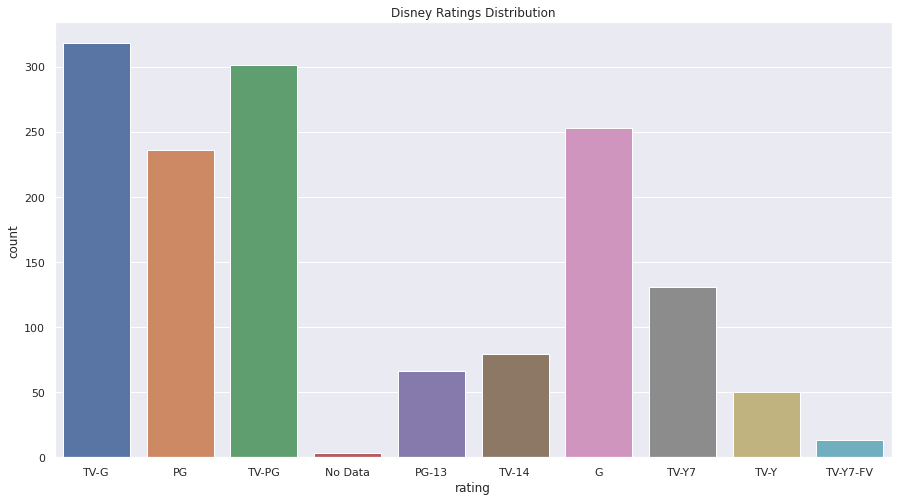

In [53]:
plt.figure(figsize = (15,8))
plt.title('Disney Ratings Distribution')
sns.countplot(x='rating', data = df3)
plt.show()

The rating's meaning are:
'TV-PG': 'Older Kids',
    TV-MA: 'Adults', 
    TV-Y7-FV: 'Older Kids', 
    TV-Y7: 'Older Kids', 
    TV-14: 'Teens', 
    R: 'Adults', 
    TV-Y: 'Kids', 
    NR: 'Adults', 
    PG-13: 'Teens', 
    TV-G: 'Kids', 
    PG: 'Older Kids', 
    G: 'Kids', 
    UR: 'Adults', 
    NC-17: 'Adults' 

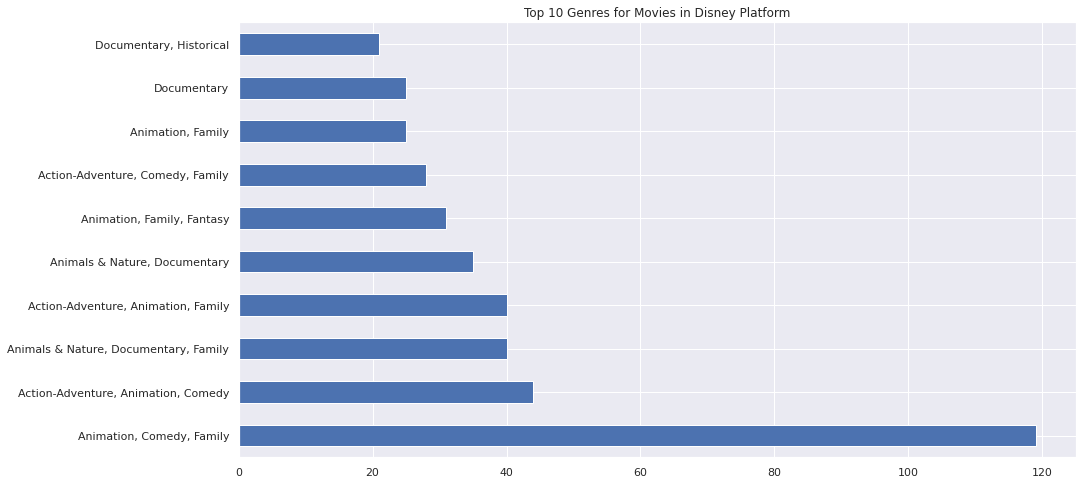

In [54]:
plt.figure(figsize = (15,8))
plt.title('Top 10 Genres for Movies in Disney Platform')
df3[df3["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind='barh')
plt.show()


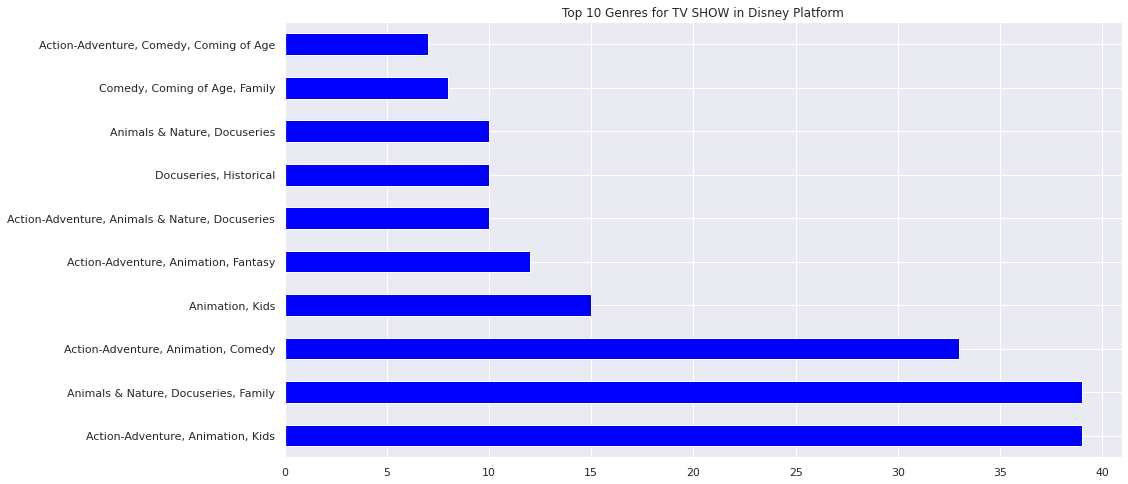

In [55]:
plt.figure(figsize = (15,8))
plt.title('Top 10 Genres for TV SHOW in Disney Platform')
df3[df3["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind='barh',color='blue')
plt.show()

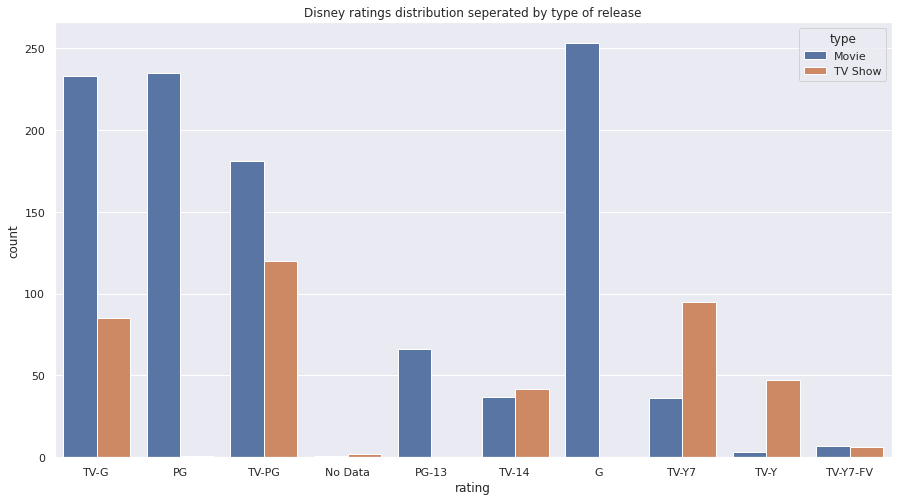

In [56]:
plt.figure(figsize = (15,8))
plt.title('Disney ratings distribution seperated by type of release')
sns.countplot(x='rating', data=df3, hue='type')
plt.show()

The rating's meaning are:

'TV-PG': 'Older Kids',
    TV-MA: 'Adults', 
    TV-Y7-FV: 'Older Kids', 
    TV-Y7: 'Older Kids', 
    TV-14: 'Teens', 
    R: 'Adults', 
    TV-Y: 'Kids', 
    NR: 'Adults', 
    PG-13: 'Teens', 
    TV-G: 'Kids', 
    PG: 'Older Kids', 
    G: 'Kids', 
    UR: 'Adults', 
    NC-17: 'Adults' 

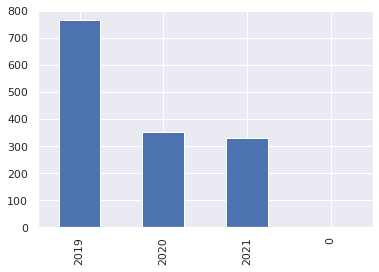

In [57]:
df3['date_added'].value_counts().plot(kind='bar')

In 2019 nearly 800 Movies and TV Shows were added while in 2020 and 2021 it decreased to half the number of 2019.

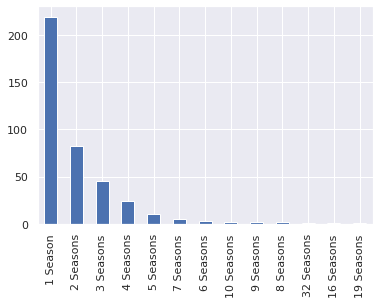

In [58]:
df_tv_show = df3[df3['type']=='TV Show']
df_tv_show['duration'].value_counts().plot(kind='bar')

From the above grph it is clearly stated that the maximum number of TV shows contains only 1 season i.e. more than 200 in number and it decerases as we maximise the number of season.

## **Visualization of DF4 (Netflix)**

Text(0.2, 1.03, 'Types of Netflix Content')

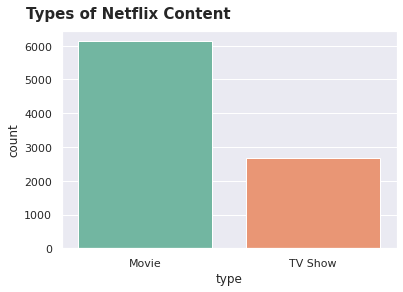

In [59]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df4, palette="Set2")
ax.set_title(f'Types of Netflix Content', fontsize=15, fontweight='bold', position=(0.20, 1.03))


This illustrates that netflix content include twice the number of movies when compared with the number of TV Shows. 


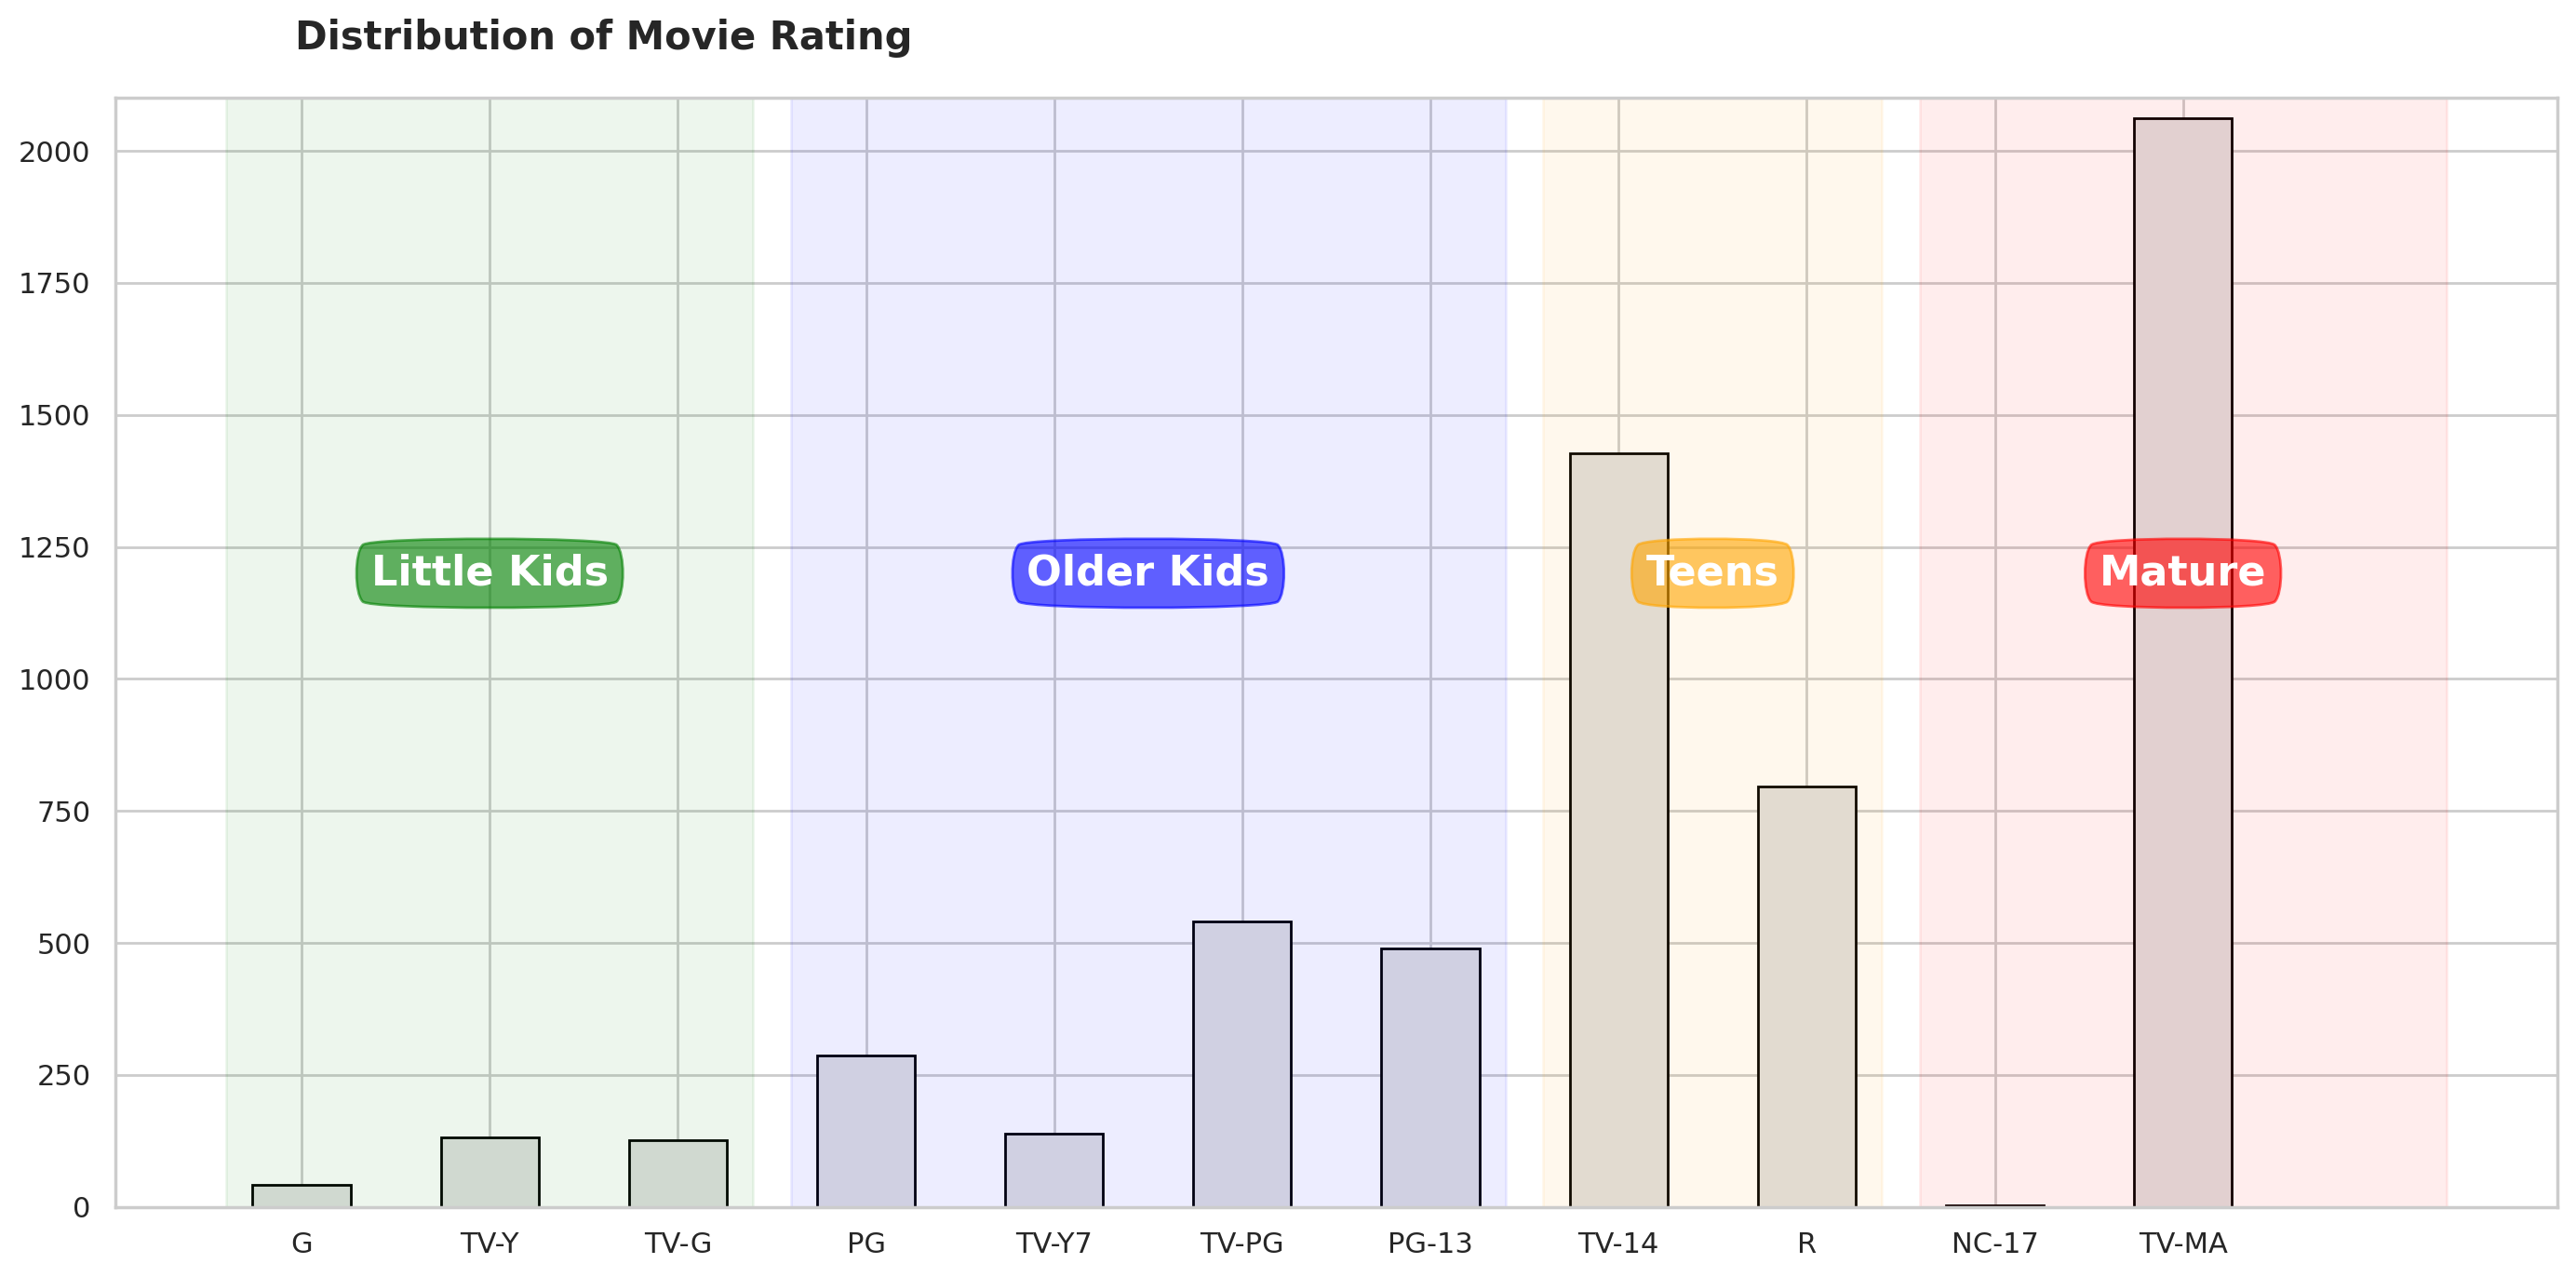

In [60]:
sns.set_style('whitegrid') # plot with grid

movie = df4[df4['type'] == 'Movie']    
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order] 

def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    fig.tight_layout()
    plt.show()
    


rating_barplot(movie_rating, 'Movie', 1200, 2100)

The rating's meaning are:

'TV-PG': 'Older Kids',
    TV-MA: 'Adults', 
    TV-Y7-FV: 'Older Kids', 
    TV-Y7: 'Older Kids', 
    TV-14: 'Teens', 
    R: 'Adults', 
    TV-Y: 'Kids', 
    NR: 'Adults', 
    PG-13: 'Teens', 
    TV-G: 'Kids', 
    PG: 'Older Kids', 
    G: 'Kids', 
    UR: 'Adults', 
    NC-17: 'Adults' 

Furthur this graph shows that most content is targeted at mature and older teen audience

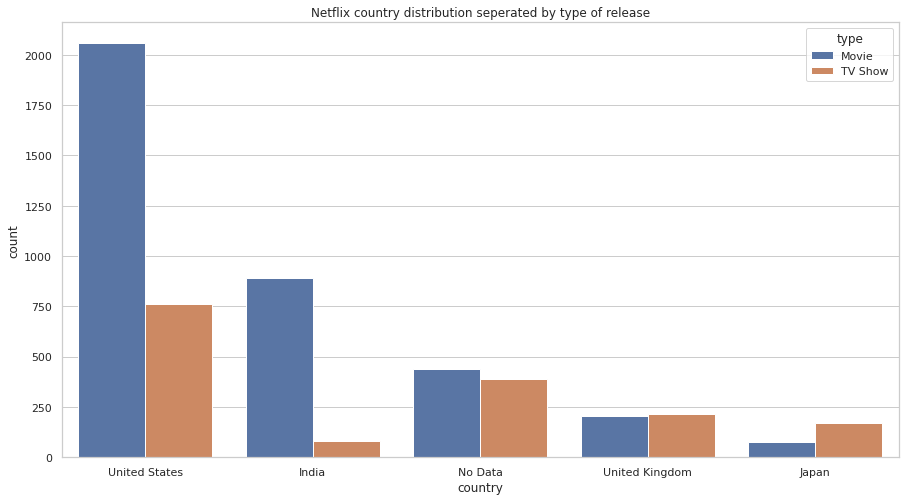

In [61]:
plt.figure(figsize = (15,8))
plt.title('Netflix country distribution seperated by type of release')
sns.countplot(x='country', data=df4, hue='type', order=df4.country.value_counts().iloc[:5].index)
plt.show()

This double bar graph shows the amount of content on Netflix Library by their country of origin

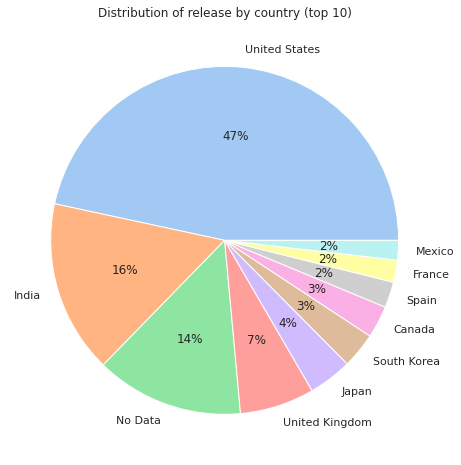

In [62]:
country_counts = df4['country'].value_counts(sort=True)
country_df = pd.DataFrame(country_counts)
country_df = country_df.reset_index()
country_df.columns = ['country', 'counts']
country_pie_df = country_df.head(10)
plt.figure(figsize = (15,8))
colors = sns.color_palette('pastel')[0:10]
plt.title('Distribution of release by country (top 10)')
plt.pie(country_pie_df['counts'], labels = country_pie_df['country'], colors = colors, autopct='%.0f%%')
plt.show()

This graph shows the amount of releases per country till now

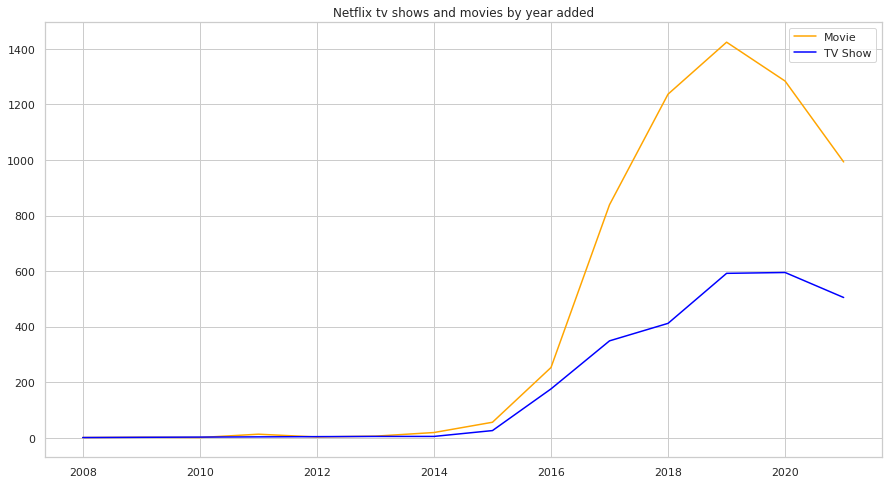

In [63]:
plt.figure(figsize=(15,8))
movie = df4[df4['type'] == 'Movie' ]
tv = df4[df4['type'] == 'TV Show']
movie = movie[movie['date_added']>2000]
tv = tv[tv['date_added']>2000]
added_counts= movie['date_added'].value_counts()
added_tv_counts= tv['date_added'].value_counts()
sns.lineplot(x=added_counts.index,y=added_counts.values, color="orange", label='Movie')
sns.lineplot(x=added_tv_counts.index,y=added_tv_counts.values, color="blue", label='TV Show')
plt.title('Netflix tv shows and movies by year added')
plt.legend()
plt.show()

This graph shows that the number of content quickly ramped up after 2014 and has slowed down recently.

# Summary of all 4 streaming sites

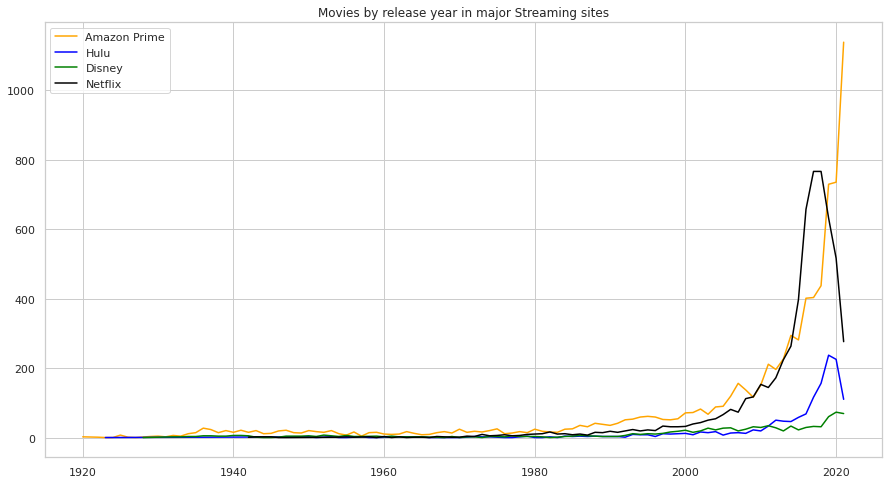

In [64]:
plt.figure(figsize=(15,8))
dd1 = df1[df1['type'] == 'Movie' ]
dd2 = df2[df2['type'] == 'Movie' ]
dd3 = df3[df3['type'] == 'Movie' ]
dd4 = df4[df4['type'] == 'Movie' ]
added_counts1= dd1['release_year'].value_counts()
added_counts2= dd2['release_year'].value_counts()
added_counts3= dd3['release_year'].value_counts()
added_counts4= dd4['release_year'].value_counts()

sns.lineplot(x=added_counts1.index,y=added_counts1.values, color="orange", label='Amazon Prime')
sns.lineplot(x=added_counts2.index,y=added_counts2.values, color="blue", label='Hulu')
sns.lineplot(x=added_counts3.index,y=added_counts3.values, color="green", label='Disney')
sns.lineplot(x=added_counts4.index,y=added_counts4.values, color="black", label='Netflix')

plt.title('Movies by release year in major Streaming sites')
plt.legend()
plt.show()

This Graph shows how Amazon Prime has more legacy programs and quickly catching up to its rivals in acquiring new ccontent

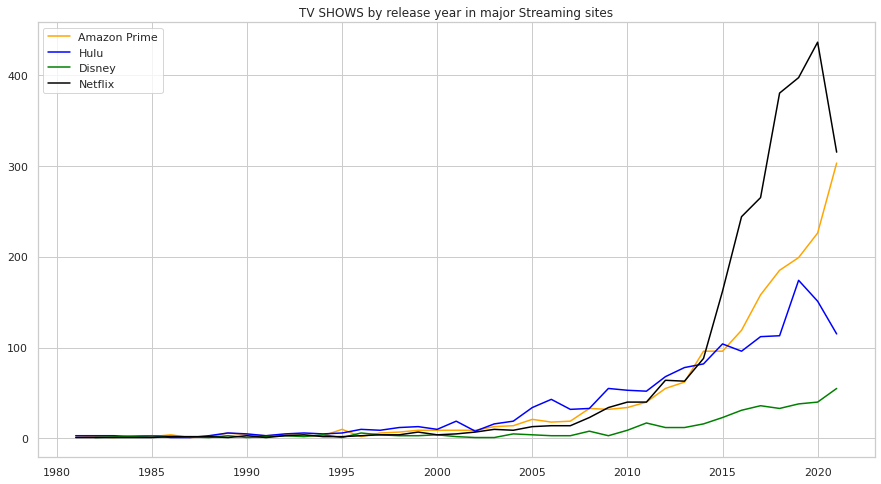

In [65]:
plt.figure(figsize=(15,8))
dt1 = df1[df1['type'] == 'TV Show' ]
dt2 = df2[df2['type'] == 'TV Show' ]
dt3 = df3[df3['type'] == 'TV Show' ]
dt4 = df4[df4['type'] == 'TV Show' ]
dt1 = dt1[dt1['release_year']>1980]
dt2 = dt2[dt2['release_year']>1980]
dt3 = dt3[dt3['release_year']>1980]
dt4 = dt4[dt4['release_year']>1980]
added_countst1= dt1['release_year'].value_counts()
added_countst2= dt2['release_year'].value_counts()
added_countst3= dt3['release_year'].value_counts()
added_countst4= dt4['release_year'].value_counts()

sns.lineplot(x=added_countst1.index,y=added_countst1.values, color="orange", label='Amazon Prime')
sns.lineplot(x=added_countst2.index,y=added_countst2.values, color="blue", label='Hulu')
sns.lineplot(x=added_countst3.index,y=added_countst3.values, color="green", label='Disney')
sns.lineplot(x=added_countst4.index,y=added_countst4.values, color="black", label='Netflix')

plt.title('TV SHOWS by release year in major Streaming sites')
plt.legend()
plt.show()

This shows that when it comes to TV Shows, Netflix is in the lead. While its closest rivals are trying to catch it.

In [66]:
df1['platform'] = 'Amazon'
df2['platform'] = 'Hulu'
df3['platform'] = 'Disney'
df4['platform'] = 'Netflix'

In [67]:
frames = [df1, df2, df3, df4]
result = pd.concat(frames, keys=["Amazon", "Hulu", "Disney", "Netflix"])


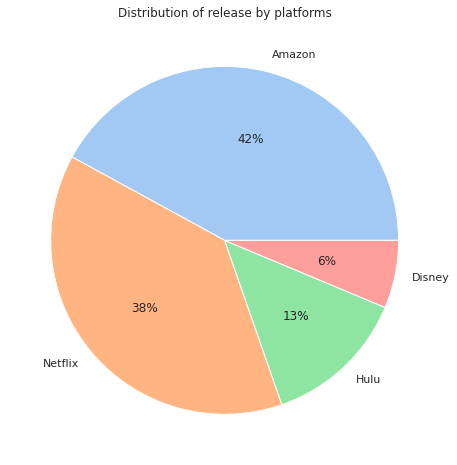

In [68]:
platform_counts = result['platform'].value_counts(sort=True)
platform_df = pd.DataFrame(platform_counts)
platform_df = platform_df.reset_index()
platform_df.columns = ['platform', 'counts']
platform_pie_df = platform_df
plt.figure(figsize = (15,8))
colors = sns.color_palette('pastel')[0:10]
plt.title('Distribution of release by platforms')
plt.pie(platform_pie_df['counts'], labels = platform_pie_df['platform'], colors = colors, autopct='%.0f%%')
plt.show()

This Pie Chart shows the total content available by platform

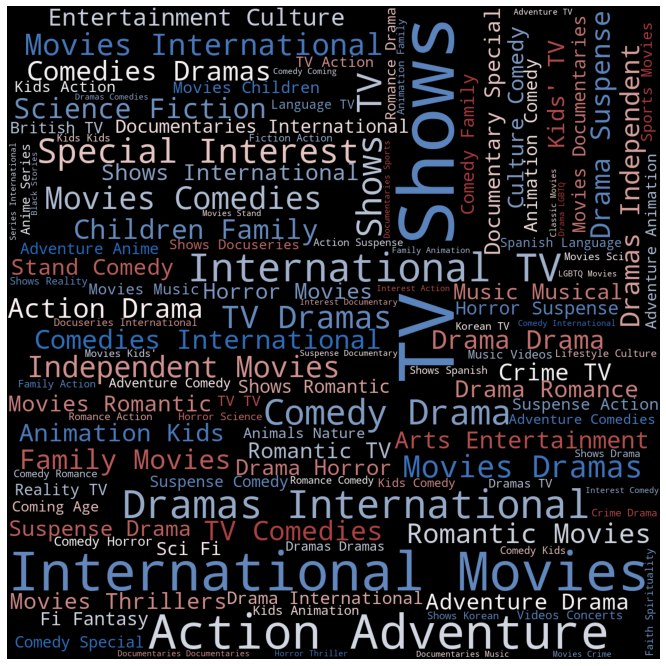

In [69]:
text = ' '.join(result['listed_in'])
plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

This word cloud shows which word are more commonly used in the content listings.

In [70]:
country_codes = {'afghanistan': 'AFG', 'albania': 'ALB', 'algeria': 'DZA', 'american samoa': 'ASM', 'andorra': 'AND', 'angola': 'AGO', 'anguilla': 'AIA',
'antigua and barbuda': 'ATG','argentina': 'ARG','armenia': 'ARM','aruba': 'ABW','australia': 'AUS','austria': 'AUT','azerbaijan': 'AZE','bahamas': 'BHM',
 'bahrain': 'BHR','bangladesh': 'BGD','barbados': 'BRB','belarus': 'BLR','belgium': 'BEL','belize': 'BLZ','benin': 'BEN','bermuda': 'BMU','bhutan': 'BTN',
 'bolivia': 'BOL','bosnia and herzegovina': 'BIH','botswana': 'BWA','brazil': 'BRA','british virgin islands': 'VGB','brunei': 'BRN','bulgaria': 'BGR',
 'burkina faso': 'BFA','burma': 'MMR','burundi': 'BDI','cabo verde': 'CPV','cambodia': 'KHM','cameroon': 'CMR','canada': 'CAN','cayman islands': 'CYM',
 'central african republic': 'CAF','chad': 'TCD','chile': 'CHL','china': 'CHN','colombia': 'COL','comoros': 'COM','congo democratic': 'COD',
 'Congo republic': 'COG','cook islands': 'COK','costa rica': 'CRI',"cote d'ivoire": 'CIV','croatia': 'HRV','cuba': 'CUB','curacao': 'CUW','cyprus': 'CYP',
 'czech republic': 'CZE','denmark': 'DNK','djibouti': 'DJI','dominica': 'DMA','dominican republic': 'DOM','ecuador': 'ECU','egypt': 'EGY',
 'el salvador': 'SLV','equatorial guinea': 'GNQ','eritrea': 'ERI','estonia': 'EST','ethiopia': 'ETH','falkland islands': 'FLK','faroe islands': 'FRO',
 'fiji': 'FJI','finland': 'FIN','france': 'FRA','french polynesia': 'PYF','gabon': 'GAB','gambia, the': 'GMB','georgia': 'GEO','germany': 'DEU',
 'ghana': 'GHA','gibraltar': 'GIB','greece': 'GRC','greenland': 'GRL','grenada': 'GRD','guam': 'GUM','guatemala': 'GTM','guernsey': 'GGY',
 'guinea-bissau': 'GNB','guinea': 'GIN','guyana': 'GUY','haiti': 'HTI','honduras': 'HND','hong kong': 'HKG','hungary': 'HUN','iceland': 'ISL','india': 'IND',
 'indonesia': 'IDN','iran': 'IRN','iraq': 'IRQ','ireland': 'IRL','isle of man': 'IMN','israel': 'ISR','italy': 'ITA','jamaica': 'JAM','japan': 'JPN','jersey': 'JEY',
 'jordan': 'JOR','kazakhstan': 'KAZ','kenya': 'KEN','kiribati': 'KIR','north korea': 'PRK','south korea': 'KOR','kosovo': 'KSV','kuwait': 'KWT',
 'kyrgyzstan': 'KGZ','laos': 'LAO','latvia': 'LVA','lebanon': 'LBN','lesotho': 'LSO','liberia': 'LBR','libya': 'LBY','liechtenstein': 'LIE','lithuania': 'LTU',
 'luxembourg': 'LUX','macau': 'MAC','macedonia': 'MKD','madagascar': 'MDG','malawi': 'MWI','malaysia': 'MYS','maldives': 'MDV','mali': 'MLI','malta': 'MLT',
'marshall islands': 'MHL','mauritania': 'MRT','mauritius': 'MUS','mexico': 'MEX','micronesia': 'FSM','moldova': 'MDA','monaco': 'MCO','mongolia': 'MNG',
 'montenegro': 'MNE','morocco': 'MAR','mozambique': 'MOZ','namibia': 'NAM','nepal': 'NPL','netherlands': 'NLD','new caledonia': 'NCL','new zealand': 'NZL',
 'nicaragua': 'NIC','nigeria': 'NGA','niger': 'NER','niue': 'NIU','northern mariana islands': 'MNP','norway': 'NOR','oman': 'OMN','pakistan': 'PAK','palau': 'PLW',
 'panama': 'PAN','papua new guinea': 'PNG','paraguay': 'PRY','peru': 'PER','philippines': 'PHL','poland': 'POL','portugal': 'PRT','puerto rico': 'PRI',
 'qatar': 'QAT','romania': 'ROU','russia': 'RUS','rwanda': 'RWA','saint kitts and nevis': 'KNA','saint lucia': 'LCA','saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM','saint vincent and the grenadines': 'VCT','samoa': 'WSM','san marino': 'SMR','sao tome and principe': 'STP',
 'saudi arabia': 'SAU','senegal': 'SEN','serbia': 'SRB','seychelles': 'SYC','sierra leone': 'SLE','singapore': 'SGP','sint maarten': 'SXM','slovakia': 'SVK',
 'slovenia': 'SVN','solomon islands': 'SLB','somalia': 'SOM','south africa': 'ZAF','south sudan': 'SSD','spain': 'ESP','sri lanka': 'LKA','sudan': 'SDN',
 'suriname': 'SUR','swaziland': 'SWZ','sweden': 'SWE','switzerland': 'CHE','syria': 'SYR','taiwan': 'TWN','tajikistan': 'TJK','tanzania': 'TZA',
 'thailand': 'THA','timor-leste': 'TLS','togo': 'TGO','tonga': 'TON','trinidad and tobago': 'TTO','tunisia': 'TUN','turkey': 'TUR','turkmenistan': 'TKM',
 'tuvalu': 'TUV','uganda': 'UGA','ukraine': 'UKR','united arab emirates': 'ARE','united kingdom': 'GBR','united states': 'USA','uruguay': 'URY',
 'uzbekistan': 'UZB','vanuatu': 'VUT','venezuela': 'VEN','vietnam': 'VNM','virgin islands': 'VGB','west bank': 'WBG','yemen': 'YEM','zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(result['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(result)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

This interactive Plotly Map and graph shows the countries most represented by the streaming Content sites.

# MODEL

In [72]:
result.head()

type                 title        director  \
       show_id                                                
Amazon s1       Movie   The Grand Seduction    Don McKellar   
       s2       Movie  Take Care Good Night    Girish Joshi   
       s3       Movie  Secrets of Deception     Josh Webber   
       s4       Movie    Pink: Staying True  Sonia Anderson   
       s5       Movie         Monster Maker    Giles Foster   

                                                             cast  \
       show_id                                                      
Amazon s1          Brendan Gleeson, Taylor Kitsch, Gordon Pinsent   
       s2        Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar   
       s3       Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   
       s4       Interviews with: Pink, Adele, BeyoncÃ©, Britne...   
       s5       Harry Dean Stanton, Kieran O'Brien, George Cos...   

                       country  date_added  release_year   rating duration  \
       show_id                                                               
Amazon s1               Canada        2021          2014  No Data  113 min   
       s2                India        2021          2018      13+  110 min   
       s3        United States        2021          2017  No Data   74 min   
       s4        United States        2021          2014  No Data   69 min   
       s5       United Kingdom        2021          1989  No Data   45 min   

                              listed_in  \
       show_id                            
Amazon s1                 Comedy, Drama   
       s2          Drama, International   
       s3       Action, Drama, Suspense   
       s4                   Documentary   
       s5                Drama, Fantasy   

                                                      description platform  
       show_id                                                              
Amazon s1       A small fishing village must procure a local d...   Amazon  
       s2       A Metro Family decides to fight a Cyber Crimin...   Amazon  
       s3       After a man discovers his wife is cheating on ...   Amazon  
       s4       Pink breaks the mold once again, bringing her ...   Amazon  
       s5       Teenage Matt Banting wants to work with a famo...   Amazon

In [73]:
def preprocessing(desc):
    desc = desc.lower()
    desc = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', ' ', desc)
    desc = " ".join(desc.split())
    
    return desc

In [74]:
result["new_description"] = result["description"].apply(lambda x: preprocessing(x))
print(result.shape)
result.head()

(22998, 13)


type                 title        director  \
       show_id                                                
Amazon s1       Movie   The Grand Seduction    Don McKellar   
       s2       Movie  Take Care Good Night    Girish Joshi   
       s3       Movie  Secrets of Deception     Josh Webber   
       s4       Movie    Pink: Staying True  Sonia Anderson   
       s5       Movie         Monster Maker    Giles Foster   

                                                             cast  \
       show_id                                                      
Amazon s1          Brendan Gleeson, Taylor Kitsch, Gordon Pinsent   
       s2        Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar   
       s3       Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   
       s4       Interviews with: Pink, Adele, BeyoncÃ©, Britne...   
       s5       Harry Dean Stanton, Kieran O'Brien, George Cos...   

                       country  date_added  release_year   rating duration  \
       show_id                                                               
Amazon s1               Canada        2021          2014  No Data  113 min   
       s2                India        2021          2018      13+  110 min   
       s3        United States        2021          2017  No Data   74 min   
       s4        United States        2021          2014  No Data   69 min   
       s5       United Kingdom        2021          1989  No Data   45 min   

                              listed_in  \
       show_id                            
Amazon s1                 Comedy, Drama   
       s2          Drama, International   
       s3       Action, Drama, Suspense   
       s4                   Documentary   
       s5                Drama, Fantasy   

                                                      description platform  \
       show_id                                                               
Amazon s1       A small fishing village must procure a local d...   Amazon   
       s2       A Metro Family decides to fight a Cyber Crimin...   Amazon   
       s3       After a man discovers his wife is cheating on ...   Amazon   
       s4       Pink breaks the mold once again, bringing her ...   Amazon   
       s5       Teenage Matt Banting wants to work with a famo...   Amazon   

                                                  new_description  
       show_id                                                     
Amazon s1       a small fishing village must procure a local d...  
       s2       a metro family decides to fight a cyber crimin...  
       s3       after a man discovers his wife is cheating on ...  
       s4       pink breaks the mold once again bringing her c...  
       s5       teenage matt banting wants to work with a famo...

In [75]:
from gensim.models.fasttext import FastText as FT_gensim

corpus = result["new_description"].tolist()
sentences = [re.split(' ', str(sentence)) for sentence in corpus]
print(corpus[0])
print(sentences[0])

a small fishing village must procure a local doctor to secure a lucrative business contract when unlikely candidate and big city doctor paul lewis lands in their lap for a trial residence the townsfolk rally together to charm him into staying as the doctor s time in the village winds to a close acting mayor murray french has no choice but to pull out all the stops
['a', 'small', 'fishing', 'village', 'must', 'procure', 'a', 'local', 'doctor', 'to', 'secure', 'a', 'lucrative', 'business', 'contract', 'when', 'unlikely', 'candidate', 'and', 'big', 'city', 'doctor', 'paul', 'lewis', 'lands', 'in', 'their', 'lap', 'for', 'a', 'trial', 'residence', 'the', 'townsfolk', 'rally', 'together', 'to', 'charm', 'him', 'into', 'staying', 'as', 'the', 'doctor', 's', 'time', 'in', 'the', 'village', 'winds', 'to', 'a', 'close', 'acting', 'mayor', 'murray', 'french', 'has', 'no', 'choice', 'but', 'to', 'pull', 'out', 'all', 'the', 'stops']


In [78]:
embedding_size = 30

FT_model = FT_gensim(size=embedding_size, min_count=2, min_n=2, max_n=5, sg=1, negative=10,
                         sample=0.001, window=5, alpha=0.025, min_alpha=0.0001)

FT_model.build_vocab(sentences)

print('corpus_count: ', FT_model.corpus_count)
print('corpus_total_words: ', FT_model.corpus_total_words)

FT_model.train(sentences,
    epochs=FT_model.epochs,
    total_examples=FT_model.corpus_count, total_words=FT_model.corpus_total_words)

print(FT_model)

corpus_count:  22998
corpus_total_words:  796584
FastText(vocab=22977, size=30, alpha=0.025)


In [79]:
FT_vector = []

for item in corpus:
    FT_vector.append(FT_model.wv[str(item)])
FT_vector = np.asarray(FT_vector)

In [80]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

kmeanModel = KMeans(n_clusters=50, random_state=42).fit(FT_vector)
cluster_id = kmeanModel.predict(FT_vector)
result["cluster_id"] = cluster_id

In [81]:
result.head()

type                 title        director  \
       show_id                                                
Amazon s1       Movie   The Grand Seduction    Don McKellar   
       s2       Movie  Take Care Good Night    Girish Joshi   
       s3       Movie  Secrets of Deception     Josh Webber   
       s4       Movie    Pink: Staying True  Sonia Anderson   
       s5       Movie         Monster Maker    Giles Foster   

                                                             cast  \
       show_id                                                      
Amazon s1          Brendan Gleeson, Taylor Kitsch, Gordon Pinsent   
       s2        Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar   
       s3       Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   
       s4       Interviews with: Pink, Adele, BeyoncÃ©, Britne...   
       s5       Harry Dean Stanton, Kieran O'Brien, George Cos...   

                       country  date_added  release_year   rating duration  \
       show_id                                                               
Amazon s1               Canada        2021          2014  No Data  113 min   
       s2                India        2021          2018      13+  110 min   
       s3        United States        2021          2017  No Data   74 min   
       s4        United States        2021          2014  No Data   69 min   
       s5       United Kingdom        2021          1989  No Data   45 min   

                              listed_in  \
       show_id                            
Amazon s1                 Comedy, Drama   
       s2          Drama, International   
       s3       Action, Drama, Suspense   
       s4                   Documentary   
       s5                Drama, Fantasy   

                                                      description platform  \
       show_id                                                               
Amazon s1       A small fishing village must procure a local d...   Amazon   
       s2       A Metro Family decides to fight a Cyber Crimin...   Amazon   
       s3       After a man discovers his wife is cheating on ...   Amazon   
       s4       Pink breaks the mold once again, bringing her ...   Amazon   
       s5       Teenage Matt Banting wants to work with a famo...   Amazon   

                                                  new_description  cluster_id  
       show_id                                                                 
Amazon s1       a small fishing village must procure a local d...          17  
       s2       a metro family decides to fight a cyber crimin...          49  
       s3       after a man discovers his wife is cheating on ...           7  
       s4       pink breaks the mold once again bringing her c...          37  
       s5       teenage matt banting wants to work with a famo...           0

In [82]:
def recommendation_system(title_name):
    top_k = 5
    title_row = result[result["title"] == title_name].copy()
    search_df = result[result["cluster_id"].isin(title_row["cluster_id"])].copy()
    search_df = search_df.drop(search_df[search_df["title"] == title_name].index)
    
    search_df["Similarity"] = search_df.apply(lambda x: FT_model.wv.similarity(title_row["new_description"], x["new_description"]), axis=1)
    search_df.sort_values(by=["Similarity"], ascending=False, inplace=True)
    
    return search_df[["title", "Similarity"]].head(top_k)

In [89]:
recommendation_system("Aakhri Adaalat")

,,title,Similarity
,show_id,,
Hulu,s942,Dredd,[0.99348897]
Netflix,s1369,Below Zero,[0.9927936]
Amazon,s6741,Misrule,[0.9911592]
Hulu,s2736,Psycho-Pass,[0.9907228]
Amazon,s7903,The Speed Reporter 1936 Crime Drama Thriller F...,[0.99033207]


In [84]:
recommendation_system("National Parks Adventure")

title    Similarity
        show_id                                     
Netflix s4052                    2,215  [0.99168164]
Hulu    s490            Summer of Soul   [0.9916012]
Netflix s5112         Myths & Monsters  [0.99127275]
        s682     They've Gotta Have Us   [0.9912634]
        s1917                     Rize   [0.9911077]

In [93]:
recommendation_system("Secrets of Deception")

title    Similarity
        show_id                                   
Netflix s6755    Final Destination 2   [0.9926323]
        s6874                  Gonul   [0.9920264]
Hulu    s1571                Carrion   [0.9911777]
Netflix s4383                    Cam  [0.99111843]
Amazon  s4340       Bright Hill Road   [0.9906574]

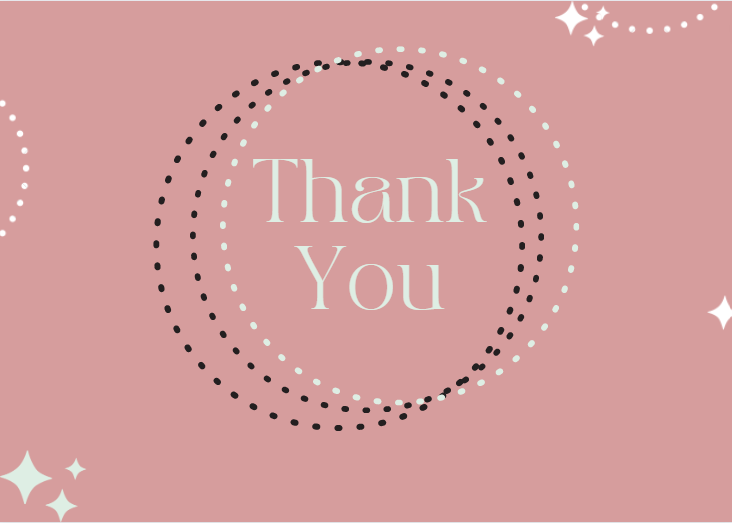